In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np


In [2]:
drop = pd.read_csv('drop_or_grad.csv')
drop

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [3]:
drop.isnull().sum() #checking for null values

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [4]:
drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [5]:
drop['Marital status'] = drop['Marital status'].replace(1, 'single')
drop['Marital status'] = drop['Marital status'].replace(2, 'married')
drop['Marital status'] = drop['Marital status'].replace(3, 'widower')
drop['Marital status'] = drop['Marital status'].replace(4, 'divorced')
drop['Marital status'] = drop['Marital status'].replace(5, 'married')
drop['Marital status'] = drop['Marital status'].replace(6, 'divorced')

#set numbers to equivalent strings. labled 'facto relationship as marriage and legally separated as divorced'

In [6]:
drop.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,single,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,single,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,single,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,single,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,married,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [7]:
drop['Nacionality'] = drop['Nacionality'].replace(1, 'european')
drop['Nacionality'] = drop['Nacionality'].replace(2, 'european')
drop['Nacionality'] = drop['Nacionality'].replace(3, 'european')
drop['Nacionality'] = drop['Nacionality'].replace(4, 'european')
drop['Nacionality'] = drop['Nacionality'].replace(5, 'european')
drop['Nacionality'] = drop['Nacionality'].replace(6, 'european')
drop['Nacionality'] = drop['Nacionality'].replace(7, 'european')
drop['Nacionality'] = drop['Nacionality'].replace(8, 'african')
drop['Nacionality'] = drop['Nacionality'].replace(9, 'african')
drop['Nacionality'] = drop['Nacionality'].replace(10, 'african')
drop['Nacionality'] = drop['Nacionality'].replace(11, 'african')
drop['Nacionality'] = drop['Nacionality'].replace(12, 'african')
drop['Nacionality'] = drop['Nacionality'].replace(13, 'middle-eastern')
drop['Nacionality'] = drop['Nacionality'].replace(14, 'latino')
drop['Nacionality'] = drop['Nacionality'].replace(15, 'european')
drop['Nacionality'] = drop['Nacionality'].replace(16, 'european')
drop['Nacionality'] = drop['Nacionality'].replace(17, 'latino')
drop['Nacionality'] = drop['Nacionality'].replace(18, 'asian')
drop['Nacionality'] = drop['Nacionality'].replace(19, 'asian')
drop['Nacionality'] = drop['Nacionality'].replace(20, 'latino')
drop['Nacionality'] = drop['Nacionality'].replace(21, 'latino')



In [8]:
drop['Previous qualification'] = drop['Previous qualification'].replace(1, 'high school only')
drop['Previous qualification'] = drop['Previous qualification'].replace(2, 'bachelor\'s degree')
drop['Previous qualification'] = drop['Previous qualification'].replace(3, 'bachelor\'s degree')
drop['Previous qualification'] = drop['Previous qualification'].replace(4, 'post grad degree')
drop['Previous qualification'] = drop['Previous qualification'].replace(5, 'post grad degree')
drop['Previous qualification'] = drop['Previous qualification'].replace(6, 'some college')
drop['Previous qualification'] = drop['Previous qualification'].replace(7, 'no high school')
drop['Previous qualification'] = drop['Previous qualification'].replace(8, 'no high school')
drop['Previous qualification'] = drop['Previous qualification'].replace(9, 'no high school')
drop['Previous qualification'] = drop['Previous qualification'].replace(10, 'no high school')
drop['Previous qualification'] = drop['Previous qualification'].replace(11, 'no high school')
drop['Previous qualification'] = drop['Previous qualification'].replace(12, 'no high school')
drop['Previous qualification'] = drop['Previous qualification'].replace(13, 'no high school')
drop['Previous qualification'] = drop['Previous qualification'].replace(14, 'some college')
drop['Previous qualification'] = drop['Previous qualification'].replace(15, 'bachelor\'s degree')
drop['Previous qualification'] = drop['Previous qualification'].replace(16, 'some college')
drop['Previous qualification'] = drop['Previous qualification'].replace(17, 'post grad degree')

In [9]:
drop.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,single,8,5,2,1,high school only,european,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,single,6,1,11,1,high school only,european,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,single,1,5,5,1,high school only,european,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,single,8,2,15,1,high school only,european,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,married,12,1,3,0,high school only,european,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [10]:
drop['Mother\'s qualification'] = drop['Mother\'s qualification'].replace(1,'high school only')
drop['Mother\'s qualification'] = drop['Mother\'s qualification'].replace(2,'bachelor\'s degree')
drop['Mother\'s qualification'] = drop['Mother\'s qualification'].replace(3,'bachelor\'s degree')
drop['Mother\'s qualification'] = drop['Mother\'s qualification'].replace(4,'post grad degree')
drop['Mother\'s qualification'] = drop['Mother\'s qualification'].replace(5,'post grad degree')
drop['Mother\'s qualification'] = drop['Mother\'s qualification'].replace(6,'some college')
drop['Mother\'s qualification'] = drop['Mother\'s qualification'].replace(7,'no high school')
drop['Mother\'s qualification'] = drop['Mother\'s qualification'].replace(8,'no high school')
drop['Mother\'s qualification'] = drop['Mother\'s qualification'].replace(9,'no high school')
drop['Mother\'s qualification'] = drop['Mother\'s qualification'].replace(10,'no high school')
drop['Mother\'s qualification'] = drop['Mother\'s qualification'].replace(11,'no high school ')
drop['Mother\'s qualification'] = drop['Mother\'s qualification'].replace(12,'no high school')
drop['Mother\'s qualification'] = drop['Mother\'s qualification'].replace(13,'no high school')
drop['Mother\'s qualification'] = drop['Mother\'s qualification'].replace(14,'high school only')
drop['Mother\'s qualification'] = drop['Mother\'s qualification'].replace(15,'high school only')
drop['Mother\'s qualification'] = drop['Mother\'s qualification'].replace(16,'some college')
drop['Mother\'s qualification'] = drop['Mother\'s qualification'].replace(17,'no high school')
drop['Mother\'s qualification'] = drop['Mother\'s qualification'].replace(18,'no high school')
drop['Mother\'s qualification'] = drop['Mother\'s qualification'].replace(19,'no high school')
drop['Mother\'s qualification'] = drop['Mother\'s qualification'].replace(20,'no high school')
drop['Mother\'s qualification'] = drop['Mother\'s qualification'].replace(21,'no high school')
drop['Mother\'s qualification'] = drop['Mother\'s qualification'].replace(22,'no high school')
drop['Mother\'s qualification'] = drop['Mother\'s qualification'].replace(23,'no high school')
drop['Mother\'s qualification'] = drop['Mother\'s qualification'].replace(24,'unknown')
drop['Mother\'s qualification'] = drop['Mother\'s qualification'].replace(25,'illiterate')
drop['Mother\'s qualification'] = drop['Mother\'s qualification'].replace(26,'no high school')
drop['Mother\'s qualification'] = drop['Mother\'s qualification'].replace(27,'no high school')
drop['Mother\'s qualification'] = drop['Mother\'s qualification'].replace(28,'no high school')
drop['Mother\'s qualification'] = drop['Mother\'s qualification'].replace(29,'some college')
drop['Mother\'s qualification'] = drop['Mother\'s qualification'].replace(30,'some college')
drop['Mother\'s qualification'] = drop['Mother\'s qualification'].replace(31,'some college')
drop['Mother\'s qualification'] = drop['Mother\'s qualification'].replace(32,'some college')
drop['Mother\'s qualification'] = drop['Mother\'s qualification'].replace(33,'post grad degree')
drop['Mother\'s qualification'] = drop['Mother\'s qualification'].replace(34,'post grad degree')


In [11]:
drop.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,single,8,5,2,1,high school only,european,no high school,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,single,6,1,11,1,high school only,european,high school only,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,single,1,5,5,1,high school only,european,no high school,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,single,8,2,15,1,high school only,european,no high school,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,married,12,1,3,0,high school only,european,no high school,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [12]:
drop['Father\'s qualification'] = drop['Father\'s qualification'].replace(1,'high school only')
drop['Father\'s qualification'] = drop['Father\'s qualification'].replace(2,'bachelor\'s degree')
drop['Father\'s qualification'] = drop['Father\'s qualification'].replace(3,'bachelor\'s degree')
drop['Father\'s qualification'] = drop['Father\'s qualification'].replace(4,'post grad degree')
drop['Father\'s qualification'] = drop['Father\'s qualification'].replace(5,'post grad degree')
drop['Father\'s qualification'] = drop['Father\'s qualification'].replace(6,'some college')
drop['Father\'s qualification'] = drop['Father\'s qualification'].replace(7,'no high school')
drop['Father\'s qualification'] = drop['Father\'s qualification'].replace(8,'no high school')
drop['Father\'s qualification'] = drop['Father\'s qualification'].replace(9,'no high school')
drop['Father\'s qualification'] = drop['Father\'s qualification'].replace(10,'no high school')
drop['Father\'s qualification'] = drop['Father\'s qualification'].replace(11,'no high school ')
drop['Father\'s qualification'] = drop['Father\'s qualification'].replace(12,'no high school')
drop['Father\'s qualification'] = drop['Father\'s qualification'].replace(13,'no high school')
drop['Father\'s qualification'] = drop['Father\'s qualification'].replace(14,'high school only')
drop['Father\'s qualification'] = drop['Father\'s qualification'].replace(15,'high school only')
drop['Father\'s qualification'] = drop['Father\'s qualification'].replace(16,'some college')
drop['Father\'s qualification'] = drop['Father\'s qualification'].replace(17,'no high school')
drop['Father\'s qualification'] = drop['Father\'s qualification'].replace(18,'no high school')
drop['Father\'s qualification'] = drop['Father\'s qualification'].replace(19,'no high school')
drop['Father\'s qualification'] = drop['Father\'s qualification'].replace(20,'no high school')
drop['Father\'s qualification'] = drop['Father\'s qualification'].replace(21,'no high school')
drop['Father\'s qualification'] = drop['Father\'s qualification'].replace(22,'no high school')
drop['Father\'s qualification'] = drop['Father\'s qualification'].replace(23,'no high school')
drop['Father\'s qualification'] = drop['Father\'s qualification'].replace(24,'unknown')
drop['Father\'s qualification'] = drop['Father\'s qualification'].replace(25,'illiterate')
drop['Father\'s qualification'] = drop['Father\'s qualification'].replace(26,'no high school')
drop['Father\'s qualification'] = drop['Father\'s qualification'].replace(27,'no high school')
drop['Father\'s qualification'] = drop['Father\'s qualification'].replace(28,'no high school')
drop['Father\'s qualification'] = drop['Father\'s qualification'].replace(29,'some college')
drop['Father\'s qualification'] = drop['Father\'s qualification'].replace(30,'some college')
drop['Father\'s qualification'] = drop['Father\'s qualification'].replace(31,'some college')
drop['Father\'s qualification'] = drop['Father\'s qualification'].replace(32,'some college')
drop['Father\'s qualification'] = drop['Father\'s qualification'].replace(33,'post grad degree')
drop['Father\'s qualification'] = drop['Father\'s qualification'].replace(34,'post grad degree')

In [13]:
drop.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,single,8,5,2,1,high school only,european,no high school,no high school,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,single,6,1,11,1,high school only,european,high school only,bachelor's degree,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,single,1,5,5,1,high school only,european,no high school,no high school,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,single,8,2,15,1,high school only,european,no high school,no high school,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,married,12,1,3,0,high school only,european,no high school,no high school,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [14]:
drop['Mother\'s occupation'] = drop['Mother\'s occupation'].replace(1,'education')
drop['Mother\'s occupation'] = drop['Mother\'s occupation'].replace(2,'law')
drop['Mother\'s occupation'] = drop['Mother\'s occupation'].replace(3,'STEM')
drop['Mother\'s occupation'] = drop['Mother\'s occupation'].replace(4,'STEM')
drop['Mother\'s occupation'] = drop['Mother\'s occupation'].replace(5,'service')
drop['Mother\'s occupation'] = drop['Mother\'s occupation'].replace(6,'service')
drop['Mother\'s occupation'] = drop['Mother\'s occupation'].replace(7,'trade')
drop['Mother\'s occupation'] = drop['Mother\'s occupation'].replace(8,'trade')
drop['Mother\'s occupation'] = drop['Mother\'s occupation'].replace(9, 'trade')
drop['Mother\'s occupation'] = drop['Mother\'s occupation'].replace(10,'trade')
drop['Mother\'s occupation'] = drop['Mother\'s occupation'].replace(11,'military')
drop['Mother\'s occupation'] = drop['Mother\'s occupation'].replace(12,'none')
drop['Mother\'s occupation'] = drop['Mother\'s occupation'].replace(13,'military')
drop['Mother\'s occupation'] = drop['Mother\'s occupation'].replace(14,'military')
drop['Mother\'s occupation'] = drop['Mother\'s occupation'].replace(15,'military')
drop['Mother\'s occupation'] = drop['Mother\'s occupation'].replace(16,'military')
drop['Mother\'s occupation'] = drop['Mother\'s occupation'].replace(17,'service')
drop['Mother\'s occupation'] = drop['Mother\'s occupation'].replace(18,'service')
drop['Mother\'s occupation'] = drop['Mother\'s occupation'].replace(19,'STEM')
drop['Mother\'s occupation'] = drop['Mother\'s occupation'].replace(20,'health')
drop['Mother\'s occupation'] = drop['Mother\'s occupation'].replace(21,'education')
drop['Mother\'s occupation'] = drop['Mother\'s occupation'].replace(22,'STEM')
drop['Mother\'s occupation'] = drop['Mother\'s occupation'].replace(23,'STEM')
drop['Mother\'s occupation'] = drop['Mother\'s occupation'].replace(24,'unknown')
drop['Mother\'s occupation'] = drop['Mother\'s occupation'].replace(25,'health')
drop['Mother\'s occupation'] = drop['Mother\'s occupation'].replace(26,'STEM')
drop['Mother\'s occupation'] = drop['Mother\'s occupation'].replace(27,'service')
drop['Mother\'s occupation'] = drop['Mother\'s occupation'].replace(28,'STEM')
drop['Mother\'s occupation'] = drop['Mother\'s occupation'].replace(29,'service')
drop['Mother\'s occupation'] = drop['Mother\'s occupation'].replace(30,'service')
drop['Mother\'s occupation'] = drop['Mother\'s occupation'].replace(31,'service')
drop['Mother\'s occupation'] = drop['Mother\'s occupation'].replace(32,'service')
drop['Mother\'s occupation'] = drop['Mother\'s occupation'].replace(33,'law')
drop['Mother\'s occupation'] = drop['Mother\'s occupation'].replace(34,'trade')
drop['Mother\'s occupation'] = drop['Mother\'s occupation'].replace(35,'trade')
drop['Mother\'s occupation'] = drop['Mother\'s occupation'].replace(36,'trade')
drop['Mother\'s occupation'] = drop['Mother\'s occupation'].replace(37,'trade')
drop['Mother\'s occupation'] = drop['Mother\'s occupation'].replace(38,'trade')
drop['Mother\'s occupation'] = drop['Mother\'s occupation'].replace(39,'trade')
drop['Mother\'s occupation'] = drop['Mother\'s occupation'].replace(40,'trade')
drop['Mother\'s occupation'] = drop['Mother\'s occupation'].replace(41,'trade')
drop['Mother\'s occupation'] = drop['Mother\'s occupation'].replace(42,'trade')
drop['Mother\'s occupation'] = drop['Mother\'s occupation'].replace(43,'trade')
drop['Mother\'s occupation'] = drop['Mother\'s occupation'].replace(44,'trade')
drop['Mother\'s occupation'] = drop['Mother\'s occupation'].replace(45,'service')
drop['Mother\'s occupation'] = drop['Mother\'s occupation'].replace(46,'service')

In [15]:
drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   object 
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   object 
 6   Nacionality                                     4424 non-null   object 
 7   Mother's qualification                          4424 non-null   object 
 8   Father's qualification                          4424 non-null   object 
 9   Mother's occupation                      

In [16]:
drop['Father\'s occupation'] = drop['Father\'s occupation'].replace(1,'education')
drop['Father\'s occupation'] = drop['Father\'s occupation'].replace(2,'law')
drop['Father\'s occupation'] = drop['Father\'s occupation'].replace(3,'STEM')
drop['Father\'s occupation'] = drop['Father\'s occupation'].replace(4,'STEM')
drop['Father\'s occupation'] = drop['Father\'s occupation'].replace(5,'service')
drop['Father\'s occupation'] = drop['Father\'s occupation'].replace(6,'service')
drop['Father\'s occupation'] = drop['Father\'s occupation'].replace(7,'trade')
drop['Father\'s occupation'] = drop['Father\'s occupation'].replace(8,'trade')
drop['Father\'s occupation'] = drop['Father\'s occupation'].replace(9,'trade')
drop['Father\'s occupation'] = drop['Father\'s occupation'].replace(10,'trade')
drop['Father\'s occupation'] = drop['Father\'s occupation'].replace(11,'military')
drop['Father\'s occupation'] = drop['Father\'s occupation'].replace(12,'none')
drop['Father\'s occupation'] = drop['Father\'s occupation'].replace(13,'military')
drop['Father\'s occupation'] = drop['Father\'s occupation'].replace(14,'military')
drop['Father\'s occupation'] = drop['Father\'s occupation'].replace(15,'military')
drop['Father\'s occupation'] = drop['Father\'s occupation'].replace(16,'military')
drop['Father\'s occupation'] = drop['Father\'s occupation'].replace(17,'service')
drop['Father\'s occupation'] = drop['Father\'s occupation'].replace(18,'service')
drop['Father\'s occupation'] = drop['Father\'s occupation'].replace(19,'STEM')
drop['Father\'s occupation'] = drop['Father\'s occupation'].replace(20,'health')
drop['Father\'s occupation'] = drop['Father\'s occupation'].replace(21,'education')
drop['Father\'s occupation'] = drop['Father\'s occupation'].replace(22,'STEM')
drop['Father\'s occupation'] = drop['Father\'s occupation'].replace(23,'STEM')
drop['Father\'s occupation'] = drop['Father\'s occupation'].replace(24,'unknown')
drop['Father\'s occupation'] = drop['Father\'s occupation'].replace(26,'STEM')
drop['Father\'s occupation'] = drop['Father\'s occupation'].replace(27,'service')
drop['Father\'s occupation'] = drop['Father\'s occupation'].replace(28,'STEM')
drop['Father\'s occupation'] = drop['Father\'s occupation'].replace(29,'service')
drop['Father\'s occupation'] = drop['Father\'s occupation'].replace(30,'service')
drop['Father\'s occupation'] = drop['Father\'s occupation'].replace(31,'service')
drop['Father\'s occupation'] = drop['Father\'s occupation'].replace(32,'service')
drop['Father\'s occupation'] = drop['Father\'s occupation'].replace(33,'law')
drop['Father\'s occupation'] = drop['Father\'s occupation'].replace(34,'trade')
drop['Father\'s occupation'] = drop['Father\'s occupation'].replace(35,'trade')
drop['Father\'s occupation'] = drop['Father\'s occupation'].replace(36,'trade')
drop['Father\'s occupation'] = drop['Father\'s occupation'].replace(37,'trade')
drop['Father\'s occupation'] = drop['Father\'s occupation'].replace(38,'trade')
drop['Father\'s occupation'] = drop['Father\'s occupation'].replace(39,'trade')
drop['Father\'s occupation'] = drop['Father\'s occupation'].replace(40,'trade')
drop['Father\'s occupation'] = drop['Father\'s occupation'].replace(41,'trade')
drop['Father\'s occupation'] = drop['Father\'s occupation'].replace(42,'trade')
drop['Father\'s occupation'] = drop['Father\'s occupation'].replace(43,'trade')
drop['Father\'s occupation'] = drop['Father\'s occupation'].replace(44,'trade')
drop['Father\'s occupation'] = drop['Father\'s occupation'].replace(45,'service')
drop['Father\'s occupation'] = drop['Father\'s occupation'].replace(46,'service')

In [17]:
drop.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,single,8,5,2,1,high school only,european,no high school,no high school,service,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,single,6,1,11,1,high school only,european,high school only,bachelor's degree,STEM,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,single,1,5,5,1,high school only,european,no high school,no high school,trade,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,single,8,2,15,1,high school only,european,no high school,no high school,service,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,married,12,1,3,0,high school only,european,no high school,no high school,trade,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [18]:
drop = drop.drop(drop.columns[[19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29 ,30]], axis = 1)

In [19]:
drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Marital status              4424 non-null   object 
 1   Application mode            4424 non-null   int64  
 2   Application order           4424 non-null   int64  
 3   Course                      4424 non-null   int64  
 4   Daytime/evening attendance  4424 non-null   int64  
 5   Previous qualification      4424 non-null   object 
 6   Nacionality                 4424 non-null   object 
 7   Mother's qualification      4424 non-null   object 
 8   Father's qualification      4424 non-null   object 
 9   Mother's occupation         4424 non-null   object 
 10  Father's occupation         4424 non-null   object 
 11  Displaced                   4424 non-null   int64  
 12  Educational special needs   4424 non-null   int64  
 13  Debtor                      4424 

In [20]:
drop['Course'] = drop['Course'].replace(1, 'agriculture')
drop['Course'] = drop['Course'].replace(2, 'Animation')
drop['Course'] = drop['Course'].replace(3, 'social service')
drop['Course'] = drop['Course'].replace(4, 'agriculture')
drop['Course'] = drop['Course'].replace(5, 'communication')
drop['Course'] = drop['Course'].replace(6, 'nursing')
drop['Course'] = drop['Course'].replace(7, 'engineering')
drop['Course'] = drop['Course'].replace(8, 'agriculture')
drop['Course'] = drop['Course'].replace(9, 'management')
drop['Course'] = drop['Course'].replace(10, 'social service')
drop['Course'] = drop['Course'].replace(11, 'tourism')
drop['Course'] = drop['Course'].replace(12, 'nursing')
drop['Course'] = drop['Course'].replace(13, 'oral hygiene')
drop['Course'] = drop['Course'].replace(14, 'marketing')
drop['Course'] = drop['Course'].replace(15, 'communication')
drop['Course'] = drop['Course'].replace(16, 'education')
drop['Course'] = drop['Course'].replace(17, 'management')


In [21]:
drop = drop.drop(drop.columns[[1,2,11,13,18,19,20,21]], axis = 1)

In [22]:
drop.head()

,Marital status,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Educational special needs,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Target
0,single,Animation,1,high school only,european,no high school,no high school,service,trade,0,1,1,0,20,Dropout
1,single,tourism,1,high school only,european,high school only,bachelor's degree,STEM,STEM,0,0,1,0,19,Graduate
2,single,communication,1,high school only,european,no high school,no high school,trade,trade,0,0,1,0,19,Dropout
3,single,communication,1,high school only,european,no high school,no high school,service,STEM,0,1,0,0,20,Graduate
4,married,social service,0,high school only,european,no high school,no high school,trade,trade,0,1,0,0,45,Graduate


In [23]:
#dropping enrollment values to focus on graduates and dropouts only

drop = drop[drop['Target'] != 'Enrolled']

exploratory questions:
* does marital status effect graduation?
* does age at enrollment affect graduation?
* does holding a scholarship affect graduation?
* does day/evening attendence affect gradtuation?
* does nationality affect graduation?
* does mother/father's education level affect graduation?
* does mother/father's occupation affect graduation?

In [24]:
import seaborn as sns

In [25]:
drop['Marital status'] = drop['Marital status'].replace('facto union', 'married')
drop['Marital status'] = drop['Marital status'].replace('legally separated', 'divorced')
#grouping facto union with married and legally separated with divorced

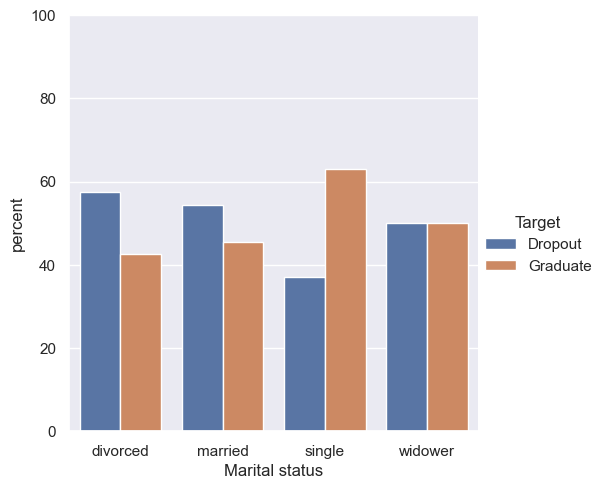

In [26]:
x,y = 'Marital status', 'Target'

df1 = drop.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

sns.set(font_scale = 1)
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)

g.ax.set_ylim(0,100)


for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()


In [27]:
observed = pd.crosstab(drop.Target, drop['Marital status'])
observed

Marital status,divorced,married,single,widower
Target,,,,
Dropout,46,190,1184,1
Graduate,34,159,2015,1


In [28]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p 
# chi squared test to see if there is a statistically signifigant relationship between the two

(51.80357467344271, 3.2981456114704644e-11)

* I can conclude that yes, there appears to be some sort of relationship between marital status and target

# does age affect graduation?

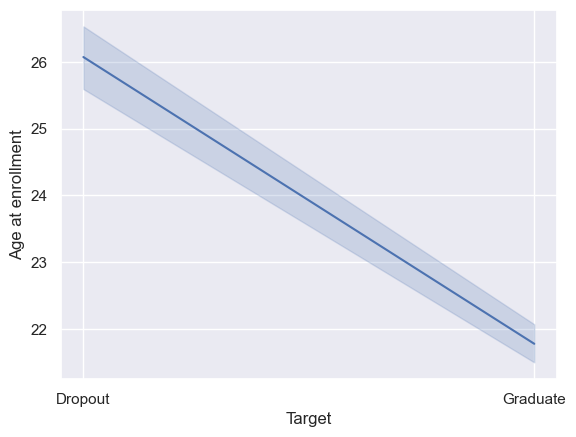

In [29]:
sns.lineplot(data = drop, x = 'Target', y = 'Age at enrollment')
plt.show()

In [30]:
drop.Target.value_counts()

Graduate    2209
Dropout     1421
Name: Target, dtype: int64

In [31]:
observed = pd.crosstab(drop.Target, drop['Age at enrollment'])

In [32]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p 

# There appears to be a relationship between these variables as well.

(476.65759642443675, 1.85433588705395e-73)

# Does holding a scholarship affect graduation?

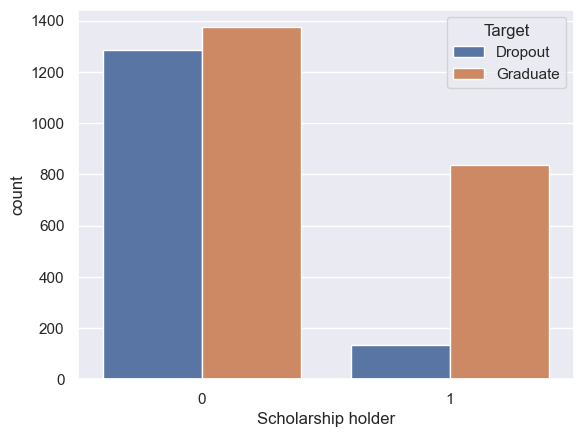

In [33]:
sns.countplot(data = drop, x = 'Scholarship holder', hue = 'Target')
plt.show()
# yes, students with scholarships are more likely to graduate

# Does day/evening attendence affect graduation?

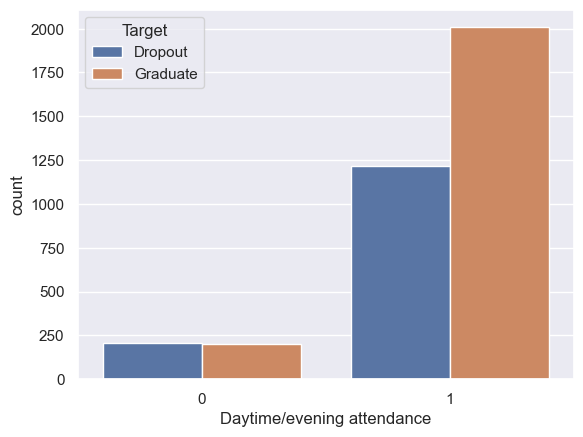

In [34]:
sns.countplot(data = drop, x = 'Daytime/evening attendance', hue = 'Target')
plt.show()


# Does nationality affect graduation?

In [35]:
drop.head()

,Marital status,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Educational special needs,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Target
0,single,Animation,1,high school only,european,no high school,no high school,service,trade,0,1,1,0,20,Dropout
1,single,tourism,1,high school only,european,high school only,bachelor's degree,STEM,STEM,0,0,1,0,19,Graduate
2,single,communication,1,high school only,european,no high school,no high school,trade,trade,0,0,1,0,19,Dropout
3,single,communication,1,high school only,european,no high school,no high school,service,STEM,0,1,0,0,20,Graduate
4,married,social service,0,high school only,european,no high school,no high school,trade,trade,0,1,0,0,45,Graduate


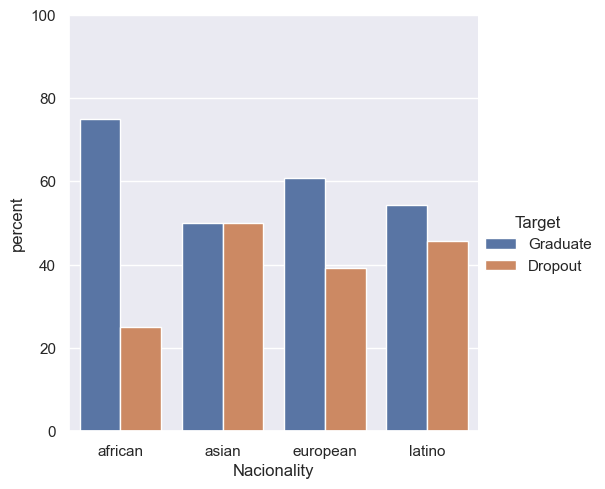

In [36]:
x,y = 'Nacionality', 'Target'

df1 = drop.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

sns.set(font_scale = 1)
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)

g.ax.set_ylim(0,100)


for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    
plt.show()

In [37]:
observed  = pd.crosstab(drop['Nacionality'], drop['Target'])

In [38]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p 

(3.185518886506427, 0.3638967134481268)

* no, there is not a relationship between nationality and graduation.

# Does mother/father's education level affect graduation?


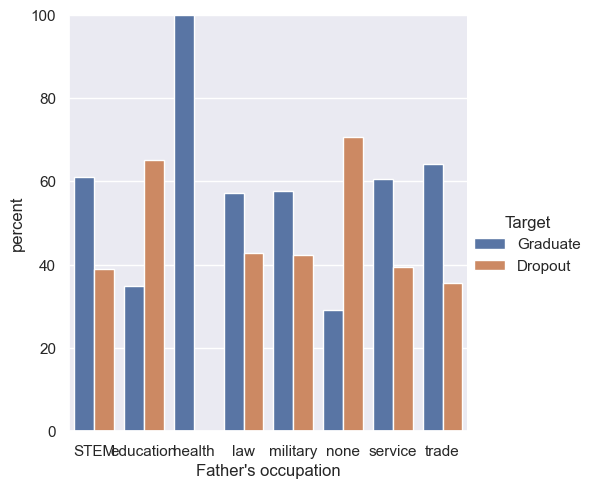

In [39]:
x,y = 'Father\'s occupation', 'Target'

df1 = drop.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

sns.set(font_scale = 1)
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)

g.ax.set_ylim(0,100)


for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    
plt.show()

In [40]:
observed = pd.crosstab(drop['Mother\'s qualification'], drop['Target'])
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p 
# mother's qualification

(17.89658033193604, 0.012445426945684344)

In [41]:
observed = pd.crosstab(drop['Father\'s qualification'], drop['Target'])
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p 
#father's qualification

(81.84993811339322, 5.77542696394002e-15)

#### yes, there is a relationship between father/mother's qualification and graduation

In [42]:
observed = pd.crosstab(drop['Father\'s occupation'], drop['Target'])
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p 

(74.61729707467312, 1.7150822513734793e-13)

In [43]:
observed = pd.crosstab(drop['Mother\'s occupation'], drop['Target'])
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p 

(109.04448871632266, 5.983667166921964e-20)

#### yes, there is a relationship between father/mother; ocupation and graduation

# Modeling

In [44]:
dummy_df = pd.get_dummies(drop[['Marital status', 'Course', 'Previous qualification', \
                               'Nacionality', 'Mother\'s qualification', 'Father\'s qualification', \
                               'Mother\'s occupation', 'Father\'s occupation']], dummy_na=False, drop_first=[True])
dummy_df.head()

,Marital status_married,Marital status_single,Marital status_widower,Course_agriculture,Course_communication,Course_education,Course_engineering,Course_management,Course_marketing,Course_nursing,...,Mother's occupation_service,Mother's occupation_trade,Mother's occupation_unknown,Father's occupation_education,Father's occupation_health,Father's occupation_law,Father's occupation_military,Father's occupation_none,Father's occupation_service,Father's occupation_trade
0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [45]:
drop = pd.concat([drop, dummy_df], axis = 1)

In [46]:
drop

,Marital status,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Educational special needs,...,Mother's occupation_service,Mother's occupation_trade,Mother's occupation_unknown,Father's occupation_education,Father's occupation_health,Father's occupation_law,Father's occupation_military,Father's occupation_none,Father's occupation_service,Father's occupation_trade
0,single,Animation,1,high school only,european,no high school,no high school,service,trade,0,...,1,0,0,0,0,0,0,0,0,1
1,single,tourism,1,high school only,european,high school only,bachelor's degree,STEM,STEM,0,...,0,0,0,0,0,0,0,0,0,0
2,single,communication,1,high school only,european,no high school,no high school,trade,trade,0,...,0,1,0,0,0,0,0,0,0,1
3,single,communication,1,high school only,european,no high school,no high school,service,STEM,0,...,1,0,0,0,0,0,0,0,0,0
4,married,social service,0,high school only,european,no high school,no high school,trade,trade,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,single,communication,1,high school only,european,high school only,high school only,service,service,0,...,1,0,0,0,0,0,0,0,1,0
4420,single,communication,1,high school only,asian,high school only,high school only,trade,trade,0,...,0,1,0,0,0,0,0,0,0,1
4421,single,nursing,1,high school only,european,no high school,no high school,trade,trade,0,...,0,1,0,0,0,0,0,0,0,1
4422,single,management,1,high school only,european,no high school,no high school,trade,service,0,...,0,1,0,0,0,0,0,0,1,0


In [47]:
just_dummies = drop.drop(columns = ['Marital status', 'Course', 'Previous qualification', \
                                   'Nacionality', 'Mother\'s qualification', 'Father\'s qualification', \
                                   'Mother\'s occupation', 'Father\'s occupation',])
just_dummies

,Daytime/evening attendance,Educational special needs,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Target,Marital status_married,Marital status_single,Marital status_widower,...,Mother's occupation_service,Mother's occupation_trade,Mother's occupation_unknown,Father's occupation_education,Father's occupation_health,Father's occupation_law,Father's occupation_military,Father's occupation_none,Father's occupation_service,Father's occupation_trade
0,1,0,1,1,0,20,Dropout,0,1,0,...,1,0,0,0,0,0,0,0,0,1
1,1,0,0,1,0,19,Graduate,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,19,Dropout,0,1,0,...,0,1,0,0,0,0,0,0,0,1
3,1,0,1,0,0,20,Graduate,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,45,Graduate,1,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,0,1,1,0,19,Graduate,0,1,0,...,1,0,0,0,0,0,0,0,1,0
4420,1,0,0,0,0,18,Dropout,0,1,0,...,0,1,0,0,0,0,0,0,0,1
4421,1,0,1,0,1,30,Dropout,0,1,0,...,0,1,0,0,0,0,0,0,0,1
4422,1,0,1,0,1,20,Graduate,0,1,0,...,0,1,0,0,0,0,0,0,1,0


In [48]:
from sklearn.model_selection import train_test_split

In [49]:
train, test = train_test_split(just_dummies, test_size=.2, random_state=123, stratify=drop.Target)
#splitting data


In [50]:
train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.Target)

In [51]:
train

,Daytime/evening attendance,Educational special needs,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Target,Marital status_married,Marital status_single,Marital status_widower,...,Mother's occupation_service,Mother's occupation_trade,Mother's occupation_unknown,Father's occupation_education,Father's occupation_health,Father's occupation_law,Father's occupation_military,Father's occupation_none,Father's occupation_service,Father's occupation_trade
3080,0,0,1,1,0,27,Graduate,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1107,1,0,1,0,1,18,Graduate,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2701,1,0,1,1,0,26,Dropout,1,0,0,...,0,0,0,0,0,0,0,0,0,0
366,1,0,1,0,1,21,Graduate,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3016,1,0,1,0,0,20,Graduate,0,1,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,1,0,1,0,0,25,Dropout,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2340,1,0,0,1,0,43,Dropout,0,1,0,...,0,1,0,0,0,0,1,0,0,0
164,1,0,1,0,0,19,Graduate,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1818,1,0,0,0,0,19,Dropout,0,1,0,...,0,1,0,0,0,0,0,0,0,1


In [52]:

#need to have separate data frames where one excludes target variable
x_train = train.drop(columns = ['Target'])
y_train = train['Target']

x_val = validate.drop(columns = ['Target'])
y_val = validate['Target']

x_test = test.drop(columns = ['Target'])
y_test = test['Target']

In [53]:
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [54]:
seed = 42
clf = DecisionTreeClassifier(max_depth = 6, random_state = 42)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [55]:
clf.score(x_train, y_train)

0.781003937007874

In [56]:
clf.score(x_val, y_val)

0.7981651376146789

In [57]:
y_pred = clf.predict(x_train)
y_pred[0:100]

array(['Dropout', 'Graduate', 'Dropout', 'Graduate', 'Graduate',
       'Graduate', 'Graduate', 'Dropout', 'Graduate', 'Graduate',
       'Dropout', 'Graduate', 'Graduate', 'Graduate', 'Graduate',
       'Dropout', 'Dropout', 'Graduate', 'Graduate', 'Graduate',
       'Dropout', 'Dropout', 'Dropout', 'Dropout', 'Graduate', 'Dropout',
       'Graduate', 'Graduate', 'Dropout', 'Dropout', 'Dropout',
       'Graduate', 'Graduate', 'Dropout', 'Dropout', 'Dropout',
       'Graduate', 'Graduate', 'Dropout', 'Graduate', 'Graduate',
       'Dropout', 'Graduate', 'Graduate', 'Graduate', 'Graduate',
       'Dropout', 'Graduate', 'Dropout', 'Graduate', 'Graduate',
       'Dropout', 'Graduate', 'Graduate', 'Dropout', 'Graduate',
       'Graduate', 'Graduate', 'Dropout', 'Dropout', 'Dropout',
       'Graduate', 'Graduate', 'Graduate', 'Dropout', 'Graduate',
       'Graduate', 'Dropout', 'Graduate', 'Dropout', 'Graduate',
       'Graduate', 'Graduate', 'Graduate', 'Dropout', 'Dropout',
       'Gradua

In [58]:
from sklearn.metrics import classification_report


In [59]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

     Dropout       0.74      0.69      0.71       796
    Graduate       0.81      0.84      0.82      1236

    accuracy                           0.78      2032
   macro avg       0.77      0.76      0.77      2032
weighted avg       0.78      0.78      0.78      2032



In [60]:
drop['Target'].value_counts() #counts number of each value in Target column

Graduate    2209
Dropout     1421
Name: Target, dtype: int64

In [61]:
accuracy = pd.DataFrame({'model' : ['decision tree'], 'baseline': [2209 / (2209 + 1421)], 'train accuracy' : \
             [clf.score(x_train, y_train)], 'validate accuracy' : [clf.score(x_val, y_val)]})

In [62]:
# modeling with KNN
from sklearn.neighbors import KNeighborsClassifier

In [63]:
knn = KNeighborsClassifier(n_neighbors=25, weights='uniform')

knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [64]:
knn.score(x_train, y_train)

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7406496062992126

In [65]:
knn.score(x_val, y_val)

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7327981651376146

In [66]:
knndf = pd.DataFrame({'model' : ['KNN'], 'baseline': [2209 / (2209 + 1421)], 'train accuracy' : \
             [knn.score(x_train, y_train)], 'validate accuracy' : [knn.score(x_val, y_val)]})

knndf

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

,model,baseline,train accuracy,validate accuracy
0,KNN,0.60854,0.74065,0.732798


In [67]:
accuracy

,model,baseline,train accuracy,validate accuracy
0,decision tree,0.60854,0.781004,0.798165


In [68]:
accuracy = pd.concat([knndf, accuracy])
accuracy

,model,baseline,train accuracy,validate accuracy
0,KNN,0.60854,0.740650,0.732798
0,decision tree,0.60854,0.781004,0.798165


In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=5,
                            n_estimators=100,
                            max_depth=11, 
                            random_state=123)

In [71]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=11, min_samples_leaf=5, random_state=123)

In [72]:
rf.score(x_train, y_train)

0.8041338582677166

In [73]:
rf.score(x_val, y_val)

0.7993119266055045

In [74]:
randomforestdf = pd.DataFrame({'model' : ['random forest'], 'baseline': [2209 / (2209 + 1421)], 'train accuracy' : \
             [rf.score(x_train, y_train)], 'validate accuracy' : [rf.score(x_val, y_val)]})

In [75]:
accuracy = pd.concat([accuracy, randomforestdf])
accuracy

,model,baseline,train accuracy,validate accuracy
0,KNN,0.60854,0.740650,0.732798
0,decision tree,0.60854,0.781004,0.798165
0,random forest,0.60854,0.804134,0.799312


## random forest is the best model

In [76]:
rf.fit(x_test, y_test)

RandomForestClassifier(max_depth=11, min_samples_leaf=5, random_state=123)

In [77]:
rf.score(x_test, y_test)

0.8168044077134986

In [78]:
import project

In [79]:
df = project.acquire_grads()

In [80]:
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [81]:
df = project.prep_grads(df)

In [82]:
df

,Marital status,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Educational special needs,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Target
0,single,Animation,1,high school only,european,no high school,no high school,service,trade,0,1,1,0,20,Dropout
1,single,tourism,1,high school only,european,high school only,bachelor's degree,STEM,STEM,0,0,1,0,19,Graduate
2,single,communication,1,high school only,european,no high school,no high school,trade,trade,0,0,1,0,19,Dropout
3,single,communication,1,high school only,european,no high school,no high school,service,STEM,0,1,0,0,20,Graduate
4,married,social service,0,high school only,european,no high school,no high school,trade,trade,0,1,0,0,45,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,single,communication,1,high school only,european,high school only,high school only,service,service,0,1,1,0,19,Graduate
4420,single,communication,1,high school only,asian,high school only,high school only,trade,trade,0,0,0,0,18,Dropout
4421,single,nursing,1,high school only,european,no high school,no high school,trade,trade,0,1,0,1,30,Dropout
4422,single,management,1,high school only,european,no high school,no high school,trade,service,0,1,0,1,20,Graduate


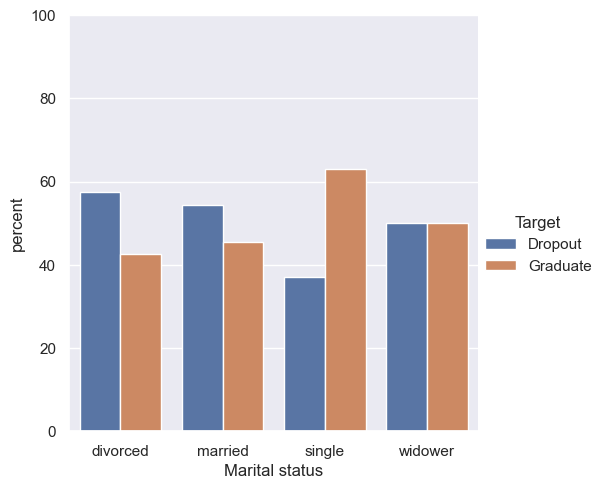

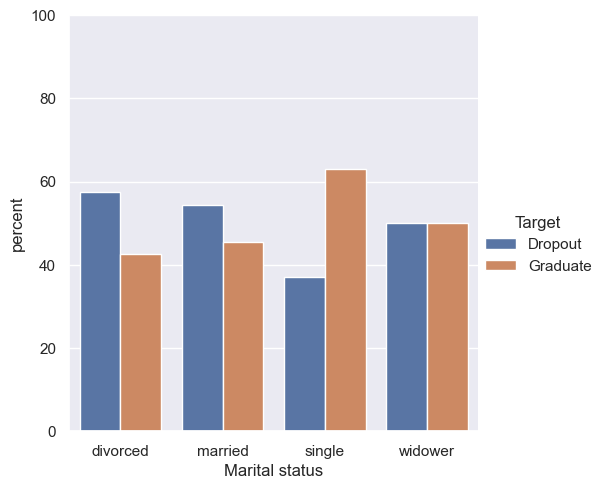

In [86]:
project.count_plots(df, 'Marital status', 'Target')
plt.show()


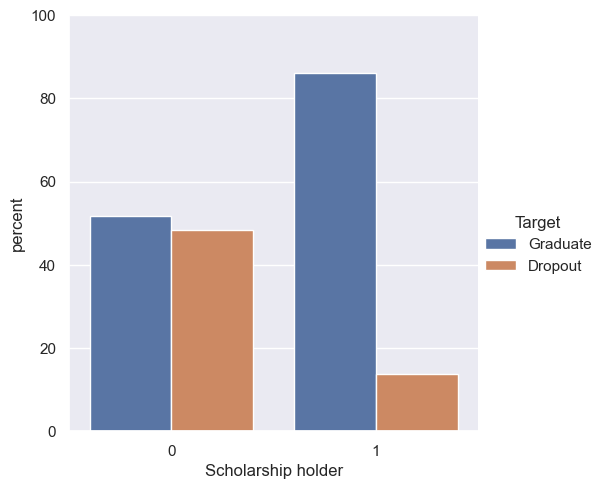

In [87]:
project.count_plots(df, 'Scholarship holder', 'Target')
plt.show()

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3630 entries, 0 to 4423
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Marital status              3630 non-null   object
 1   Course                      3630 non-null   object
 2   Daytime/evening attendance  3630 non-null   int64 
 3   Previous qualification      3630 non-null   object
 4   Nacionality                 3630 non-null   object
 5   Mother's qualification      3630 non-null   object
 6   Father's qualification      3630 non-null   object
 7   Mother's occupation         3630 non-null   object
 8   Father's occupation         3630 non-null   object
 9   Educational special needs   3630 non-null   int64 
 10  Tuition fees up to date     3630 non-null   int64 
 11  Gender                      3630 non-null   int64 
 12  Scholarship holder          3630 non-null   int64 
 13  Age at enrollment           3630 non-null   int6